# **Cargar el libro de "Alicia en el país de las maravillars"**
* Cargamos el texto del libro "Alicia en el país de las maravillas" desde un repositorio de GitHub o de otro lugar.

In [42]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('all')
from nltk.util import ngrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_

In [43]:
alicia_text = nltk.corpus.gutenberg.raw('carroll-alice.txt')
print(alicia_text[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


# **Tokenizar**
* Tokenizamos el texto utilizando la función word_tokenize de NLTK.

In [46]:
tokens = nltk.word_tokenize(alicia_text)
print(tokens[:100])

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot']


# **N-gramas**
* Generamos n-gramas de longitud 2 utilizando la función ngrams de NLTK.

In [60]:
bigrams = list(ngrams(tokens, 2))

* Mostramos los 10 primeros n-gramas.

In [48]:
print("10 primeros bigramas:")
print(bigrams[:10])

10 primeros bigramas:
[('[', 'Alice'), ('Alice', "'s"), ("'s", 'Adventures'), ('Adventures', 'in'), ('in', 'Wonderland'), ('Wonderland', 'by'), ('by', 'Lewis'), ('Lewis', 'Carroll'), ('Carroll', '1865'), ('1865', ']')]


* Generamos n-gramas de longitud 3 y mostramos los 10 primeros.

In [50]:
trigrams = list(ngrams(tokens, 3))
print("10 primeros trigramas:")
print(trigrams[:10])

10 primeros trigramas:
[('[', 'Alice', "'s"), ('Alice', "'s", 'Adventures'), ("'s", 'Adventures', 'in'), ('Adventures', 'in', 'Wonderland'), ('in', 'Wonderland', 'by'), ('Wonderland', 'by', 'Lewis'), ('by', 'Lewis', 'Carroll'), ('Lewis', 'Carroll', '1865'), ('Carroll', '1865', ']'), ('1865', ']', 'CHAPTER')]


* Cambia la longitud de los n-gramas a 4 o 5 y observa cómo cambia la salida.

In [61]:
pentagrams = list(ngrams(tokens, 5))
print("10 primeros pentagramas:")
print(pentagrams[:10])

# **Gráfica**
* Creamos una gráfica de frecuencia de n-gramas utilizando la función FreqDist de NLTK y la biblioteca matplotlib.

In [52]:
# Crear frecuencia de bigrams
bigram_freq = FreqDist(bigrams)

# Crear frecuencia de trigrams
trigram_freq = FreqDist(trigrams)

# Crear frecuencia de pentagrams
pentagram_freq = FreqDist(pentagrams)

In [ ]:
most_common_bigrams = bigram_freq.most_common(10)
bigram_words = [' '.join(pair[0]) for pair in most_common_bigrams]
bigram_counts = [pair[1] for pair in most_common_bigrams]

# most_common_trigrams = trigram_freq.most_common(10)
# trigram_words = [' '.join(pair[0]) for pair in most_common_trigrams]
# trigram_counts = [pair[1] for pair in most_common_trigrams]

most_common_pentagrams = pentagram_freq.most_common(10)
pentagram_words = [' '.join(pair[0]) for pair in most_common_pentagrams]
pentagram_counts = [pair[1] for pair in most_common_pentagrams]

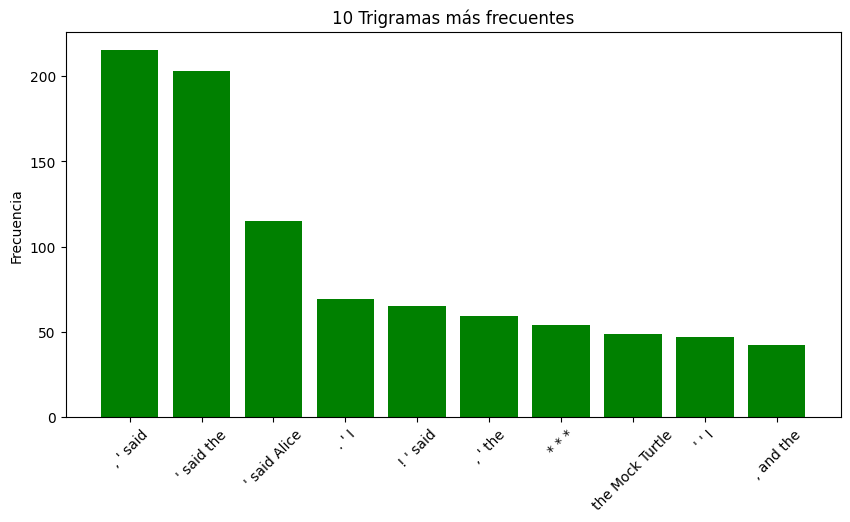

In [58]:
plt.figure(figsize=(10, 5))
plt.bar(bigram_words, bigram_counts, color='blue')
plt.xticks(rotation=45)
plt.title("10 Bigramas más frecuentes")
plt.ylabel("Frecuencia")
plt.show()

# plt.figure(figsize=(10, 5))
# plt.bar(trigram_words, trigram_counts, color='green')
# plt.xticks(rotation=45)
# plt.title("10 Trigramas más frecuentes")
# plt.ylabel("Frecuencia")
# plt.show()

plt.figure(figsize=(10, 5))
plt.bar(pentagram_words, pentagram_counts, color='green')
plt.xticks(rotation=45)
plt.title("10 pentagramas más frecuentes")
plt.ylabel("Frecuencia")
plt.show()

* Creamos una gráfica de distribución de frecuencias de n-gramas utilizando la función hist de matplotlib.

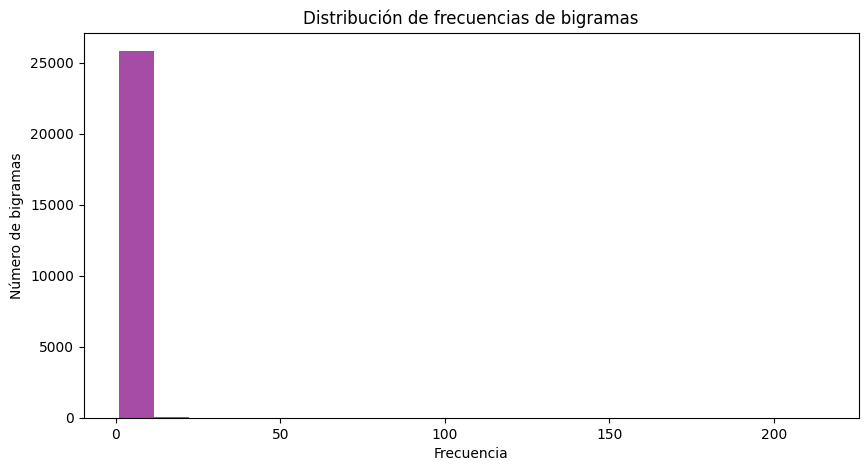

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(bigram_freq.values(), bins=20, color='purple', alpha=0.7)
plt.title("Distribución de frecuencias de bigramas")
plt.xlabel("Frecuencia")
plt.ylabel("Número de bigramas")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(trigram_freq.values(), bins=20, color='purple', alpha=0.7)
plt.title("Distribución de frecuencias de trigramas")
plt.xlabel("Frecuencia")
plt.ylabel("Número de triramas")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(pentagram_freq.values(), bins=20, color='purple', alpha=0.7)
plt.title("Dtribución de frecuencias dpentagramas")
plt.xlabel("Frecuencia")
plt.ylabel("Número dpentaramas")
plt.show()